# Proyecto con Credit Score 

- La idea de este proyecto es utilizar mejorar mis habilidades utilizando ML y un pequeño EDA. 
- Este proyecto está pensado en crear una clasificación teniendo en cuenta el perfil de una persona.




In [16]:
#Para la manipulación de datos
import pandas as pd 
import numpy as np 


#Para el análisis de la muestra
import matplotlib.pyplot as plt 
import seaborn as sns 

# Para ML
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Leemos el csv

df = pd.read_csv(r"C:\Users\Gabriel Castillo\Desktop\Cosas Gabriel\Credit Score\train.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
# Vemos info del csv 

df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [4]:
# Más info del csv
df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [5]:
# Más info del csv

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
df.Age.value_counts()

38.0    3070
28.0    3045
31.0    3037
26.0    3025
32.0    2969
36.0    2953
25.0    2952
27.0    2951
35.0    2940
39.0    2927
34.0    2922
44.0    2902
22.0    2890
19.0    2875
41.0    2865
20.0    2833
37.0    2832
29.0    2823
43.0    2809
30.0    2807
21.0    2792
24.0    2789
23.0    2719
45.0    2712
40.0    2695
42.0    2643
33.0    2623
18.0    2427
46.0    1670
15.0    1615
17.0    1551
16.0    1505
49.0    1419
48.0    1416
55.0    1395
53.0    1394
52.0    1388
54.0    1342
51.0    1332
50.0    1305
47.0    1265
14.0    1197
56.0     379
Name: Age, dtype: int64

### EDA Muestra

C:\Users\Gabriel Castillo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


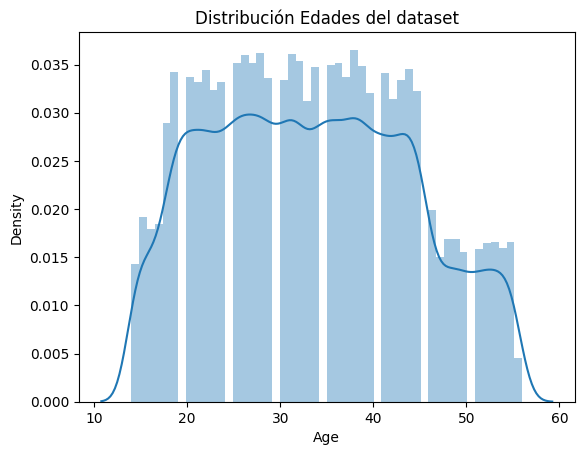

In [7]:
# Distribución de las edades

sns.distplot(df['Age'], kde= True, )
plt.title('Distribución Edades del dataset');

In [8]:
# Observamos los tipos de credit scores 
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

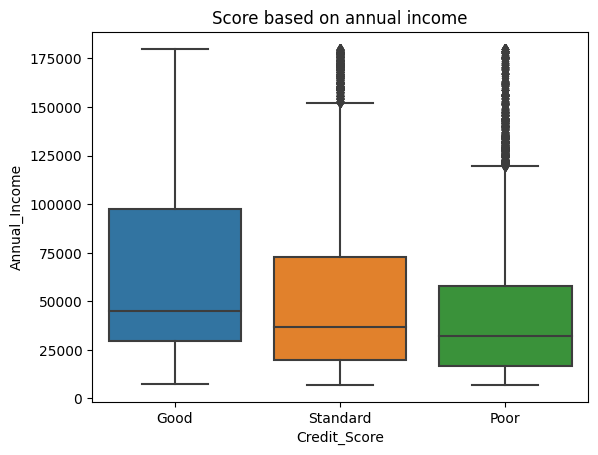

In [9]:
# Observamos si el annual income afecta 

sns.boxplot(df,
            x='Credit_Score',
            y='Annual_Income')
plt.title('Score based on annual income');

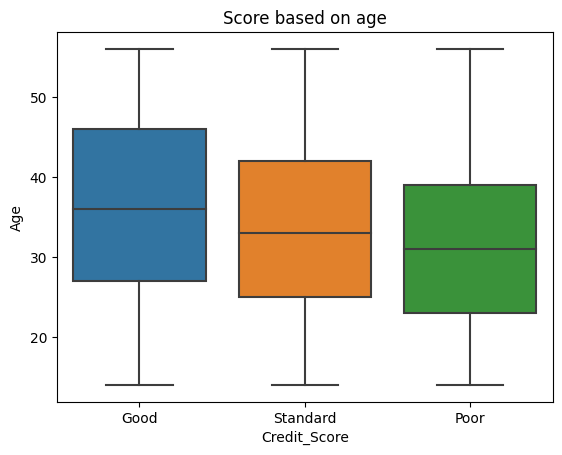

In [10]:
# Observamos si la edad afecta

sns.boxplot(df,
            x='Credit_Score',
            y='Age')
plt.title('Score based on age');

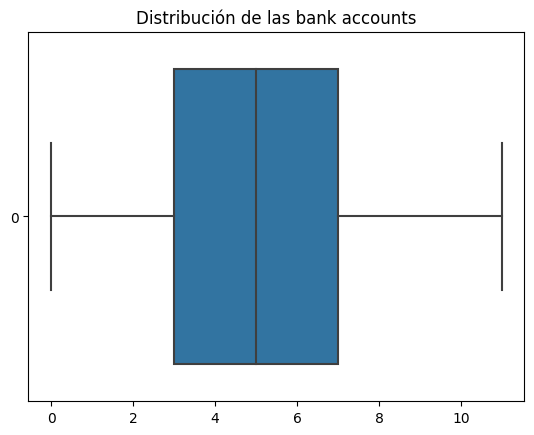

In [11]:
# El numero de bank accounts

sns.boxplot(df.Num_Bank_Accounts,
            orient='h')
plt.title('Distribución de las bank accounts');

Text(0.5, 0, 'Profesiones')

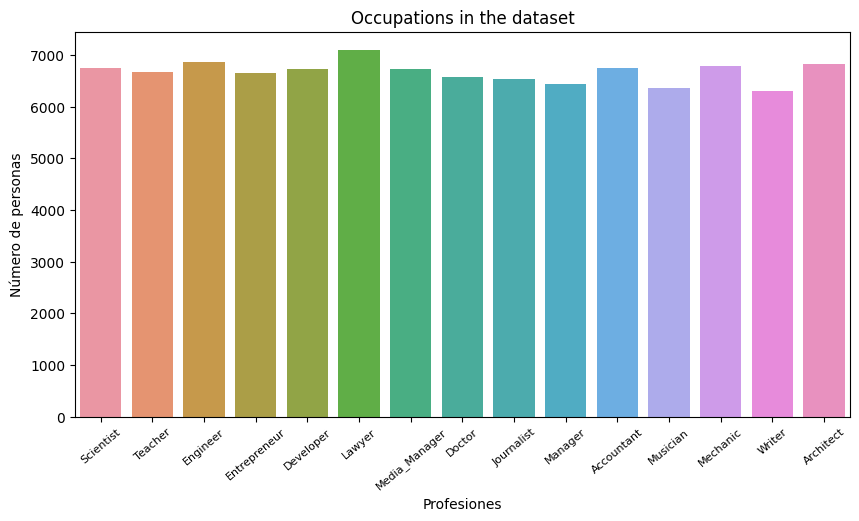

In [12]:
# Numero de profesiones

plt.figure(figsize=(10,5))
sns.countplot(df, 
              x='Occupation')
plt.xticks(rotation=40, fontsize=8);
plt.title('Occupations in the dataset');
plt.ylabel('Número de personas')
plt.xlabel('Profesiones')

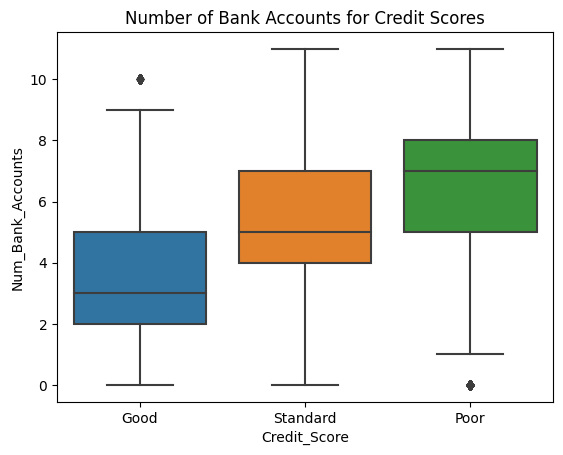

In [13]:
sns.boxplot(df, 
            x = df.Credit_Score,
            y= df.Num_Bank_Accounts)
plt.title('Number of Bank Accounts for Credit Scores');


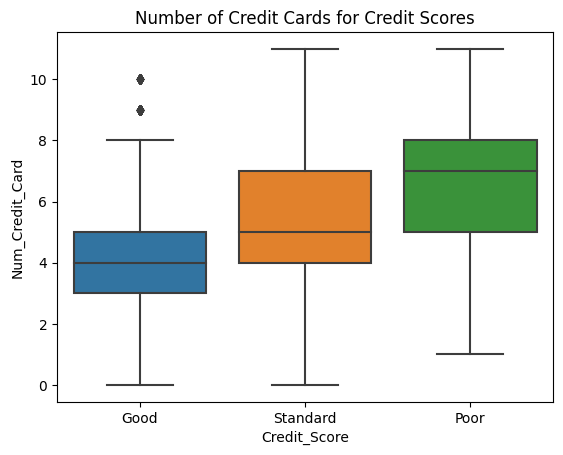

In [14]:
sns.boxplot(df, 
            x = df.Credit_Score,
            y= df.Num_Credit_Card)
plt.title('Number of Credit Cards for Credit Scores');


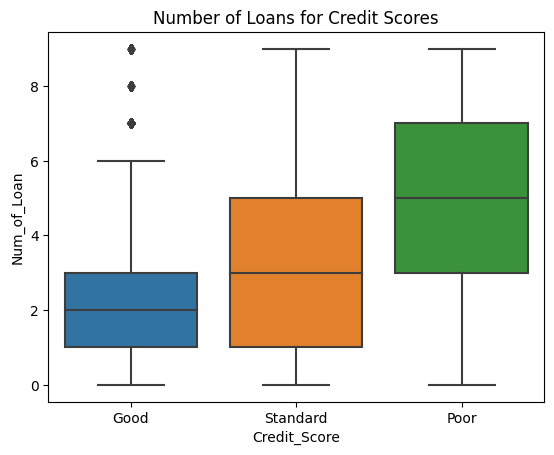

In [15]:
sns.boxplot(df, 
            x = df.Credit_Score,
            y= df.Num_of_Loan)
plt.title('Number of Loans for Credit Scores');


In [ ]:
# Otras gráficas más 

In [19]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


### Algoritmo de clasificación


In [21]:
# Cambiamos de letras a numeros 

df['Credit_Mix'] = df['Credit_Score'].map({'Standard': 2,
                                     'Good': 1,
                                     'Poor': 0})

In [56]:
# Hacemos el train/test/split

x = np.array(df[['Age',"Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])

y = np.array(df[['Credit_Score']])

xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size= 0.35,
                                                random_state=42)

In [57]:
# Creamos el modelo
# El .ravel() sirve para cambiar la dimensión del ytrain 


ytrain = ytrain.ravel()

model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
# Hacemos la clasificación 
print('Predcciones')

print('='*60)
a = float(input('Age'))
b = float(input("Annual Income: "))
c = float(input("Monthly Inhand Salary: "))
d = float(input("Number of Bank Accounts: "))
e = float(input("Number of Credit cards: "))
f = float(input("Interest rate: "))
g = float(input("Number of Loans: "))
h = float(input("Average number of days delayed by the person: "))
i = float(input("Number of delayed payments: "))
j = input("Credit Mix (Bad: 0, Standard: 1, Good: 2) : ")
k = float(input("Outstanding Debt: "))
l = float(input("Credit History Age: "))
m = float(input("Monthly Balance: "))

desc = np.array([[a,b,c,d,e,f,g,h,i,j,k,l,m]])
print('Credit Score = ', model.predict(desc))

Predcciones
Credit Score =  ['Standard']


In [60]:
model.predict(xtest)

array(['Good', 'Poor', 'Good', ..., 'Standard', 'Standard', 'Poor'],
      dtype=object)

In [61]:
model.score(xtest, ytest)

1.0